## Codio Activity 7.5: Calculating Multiple Loss Functions

**Expected Time = 60 minutes**

**Total Points = 20**

A third loss function mentioned is the Huber loss function.  This is notable for its resistance to extreme values and is defined as a piecewise function:


$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

In this activity, you will compute and compare the results of minimizing the mean squared error, mean absolute error, and huber loss functions.  

NOTE: If the formula is not rendering correctly (overlapping text), double-click in this cell and then Shift-Enter to reload the cell.


## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

### The tips data

For this exercise, the tips dataset from the lectures will be used, and you are to predict the tip amount given the total bill.  

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
x = tips['total_bill']
y = tips['tip']

[Back to top](#Index:) 

## Problem 1

### Create a Huber Loss function

**10 Points**

Using the formula repeated below for the Huber loss, complete the function that returns the sum of the Huber Loss equation.

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

Your function will take in both a value for $\theta$ and for $\delta$.  Set the value of $\delta = 1.5$ by default.

In [8]:
#GRADED

def huber_loss(theta, delta):
    """
    This function accepts a value for theta
    and returns the sum of the huber loss.
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
           
    delta: float
           Value for delta in Huber Loss
            
    Returns
    -------
    huber: np.float
         Sum of huber loss
    """

### BEGIN SOLUTION
def huber_loss(theta, delta = 1.5):
    y_pred = theta*x
    y_err = np.abs(y - y_pred) 
    return sum(np.where(y_err <= delta, 1/2*(y_err)**2, delta*(y_err - 1/2*delta)))
### END SOLUTION

huber_loss(8)

56561.369999999995

In [8]:
### BEGIN HIDDEN TESTS
def huber_loss_(theta, delta = 1.5):
    y_pred = theta*X
    y_err = np.abs(y - y_pred) 
    return sum(np.where(y_err <= delta, 1/2*(y_err)**2, delta*(y_err - 1/2*delta)))
ans_ = huber_loss_(8)
stu = huber_loss(8)
#
#
#
assert type(ans_) == type(stu), 'Make sure you return a float'
assert ans_ == stu, 'Your function does not return the same solution for theta = 8'
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### Minimizing Huber Loss

**10 Points**

Use the `minimize` function imported from `scipy.optimize` to determine the optimal value for $\theta$ based on the Huber Loss with $\delta = 1.5$.  Assign your results as type `np.float` to `theta_huber` below with `x0 = .5`.  


Hint: Use the `minimize` function with an initial guess of 0.5 and assign the value to `minimum_theta`

In [11]:
### GRADED
# Use the `minimize` function with an initial guess of 0.5 and assign the value to `minimum_theta` variable
minimum_theta = None

theta_huber = ''

### BEGIN SOLUTION
minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = float(minimum_theta.x[0])
### END SOLUTION

# Answer check
print(type(theta_huber))
print(theta_huber)

<class 'float'>
0.14626752601211537


In [13]:
### BEGIN HIDDEN TESTS
def huber_loss_(theta, delta = 1.5):
    y_pred = theta*X
    y_err = np.abs(y - y_pred) 
    return sum(np.where(y_err <= delta, 1/2*(y_err)**2, delta*(y_err - 1/2*delta)))

minimum_theta_ = minimize(huber_loss_, x0 = .5)
theta_huber_ = minimum_theta_.x[0]

#
#
#
assert type(theta_huber_) == type(theta_huber) or type(float(theta_huber_)) == type(theta_huber) 
assert minimum_theta.success == minimum_theta_.success
assert np.isclose(theta_huber_, theta_huber, atol=1e-6)
np.testing.assert_equal(minimum_theta_, minimum_theta)

### END HIDDEN TESTS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


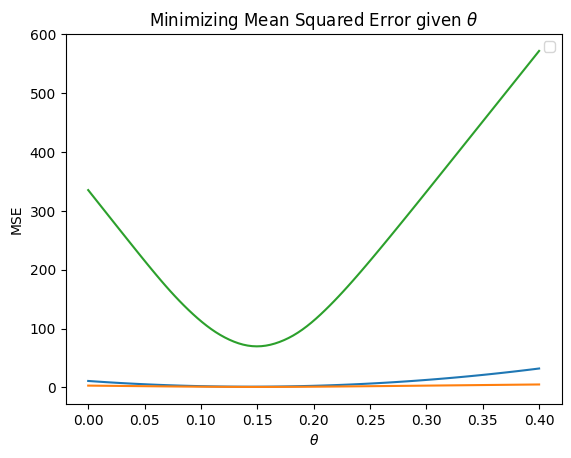

In [14]:
thetas = np.linspace(0, 0.4, 100)

def l2_loss(theta):
    return np.mean((y - theta*x)**2)

def mae_loss(theta):
    return np.mean(np.abs(y - theta*x))

plt.plot(thetas, [l2_loss(i) for i in thetas])
plt.plot(thetas, [mae_loss(i) for i in thetas])
plt.plot(thetas, [huber_loss(i, delta = 0.5) for i in thetas])
#plt.plot(theta_solution, l2_loss(theta_solution), 'ro', label = f'solution: {np.round(theta_solution[0], 3)}')
plt.legend();
plt.title(r'Minimizing Mean Squared Error given $\theta$');
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');